© Thulani Nyama

# South African Language Identification Hack 2022


## Honour Code
I **THULANI, NYAMA**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).  

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>
## Table of Content

<a href=#one>Introduction</a>

<a href=#two>Import Packages</a>

<a href=#three>Import Data</a>

<a href=#four>Exploratory Data Analysis<a>

<a href=#five>Data Engineering</a>

<a href=#six>Feature Engineering</a>

<a href=#seven>Modelling</a>

<a href=#eight>Model Performance</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From <a href="https://www.gov.za/about-sa/south-africas-people">South African Government</a>

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/> 

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a href="https://bilingua.io/how-to-say-hello-in-100-languages">Image credit</a>

### Problem Statement

Based on the linguistic diversity of the South African society, Having a model that can translate accurately any piece of text to it's required natural language, will go a long way in bridging the communication gap in any of her systems, encouraging inclusion and diversity, and finally enhanced productivity.

<a id="two"></a>
## IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

Below it imports of packages utilized for the purpose of classifying South African languages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import StackingClassifier

c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\F5470242\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<a id="three"></a>
## Import Data
<a href=#cont>Back to Table of Contents</a>

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

In [2]:
# load data
df_train = pd.read_csv('https://raw.githubusercontent.com/ThulaniNyama/south-african-language-identification-hack-2022-data/main/train_set.csv')
df_test =pd.read_csv('https://raw.githubusercontent.com/ThulaniNyama/south-african-language-identification-hack-2022-data/main/test_set.csv')

<a id="four"></a>
## Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any corrupt data and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

Now let's proceed to carrying out some EDA on our train dataset

In [3]:
# view dataset
print('\t\t\tTrain dataset')
print(df_train.head())
print('')
print('\t\t\tTest dataset')
print(df_test.head())

			Train dataset
  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

			Test dataset
   index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.


In [4]:
# visualize the shape of datasets
print(f'Number of rows in train dataset   : {df_train.shape[0]}')
print(f'Number of rows in test  dataset   : {df_test.shape[0]}')
print(f'Number of columns in test  dataset: {df_train.shape[1]}')
print(f'Number of columns in test  dataset: {df_test.shape[1]}')

Number of rows in train dataset   : 33000
Number of rows in test  dataset   : 5682
Number of columns in test  dataset: 2
Number of columns in test  dataset: 2


In [5]:
# view unique sentiments in train data set
type_labels = list(df_train.lang_id.unique())
print('Language IDs:', type_labels)

Language IDs: ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


There is `33000 & 5682 observations` for train and test datasets respectively as seen above. Each label represents one of the following classes:

Class Description
*  **xho :**     `Xhosa Language`
*  **eng :**     `English Language`
*  **nso :**     `Nsowiki Language`
*  **ven :**     `Venda Language `
*  **tsn :**     `Tswana Language`
*  **nbl :**     `Ndebele Language`
*  **zul :**     `Zulu Language`
*  **ssw :**     `Swazi Language`
*  **tso :**     `Tsonga Language`
*  **sot :**     `Sotho Language`
*  **afr :**     `Afrikaans Language`

Variable definitions
- **lang_id :**  Language Class
- **text :**     Text Language translation  

#### Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The features in our dataset are only in `Object` form , and All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

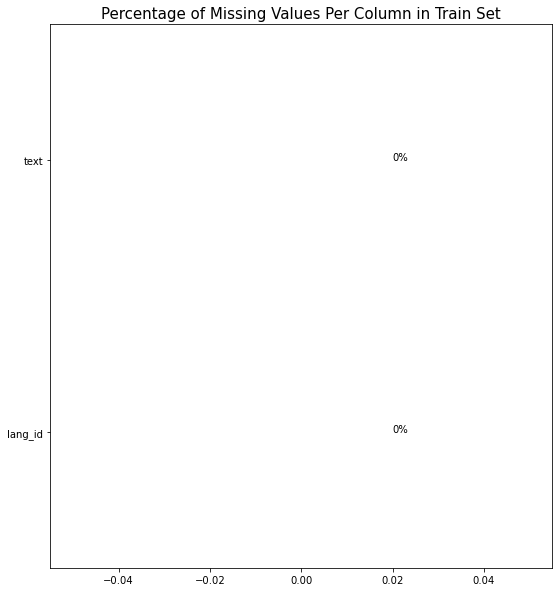

In [7]:
# plot missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10), color='tab:red')
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

The above diagram shows that there is no missing values

#### Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different language_ID

In [8]:
# look at the count of observations in sentiments
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

c:\Users\F5470242\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


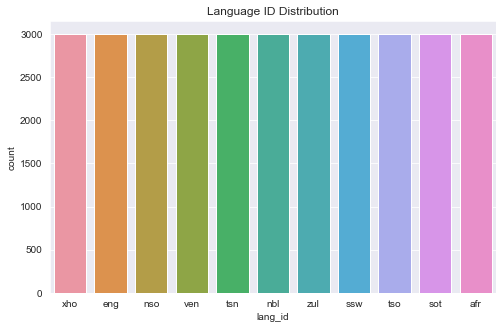

In [9]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['lang_id'])
plt.title('Language ID Distribution')
plt.show()

The Distribution chart clearly reveals our dataset is `Well Balance`. [Class Imbalance]('https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/') can greatly affect the training of our model. [Click to Now more.]('https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/') 

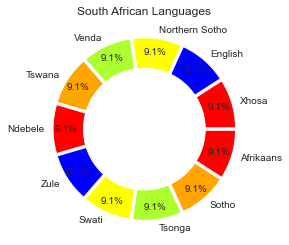

In [10]:
# Setting labels for items in Chart
Language_IDs = ['Xhosa', 'English', 'Northern Sotho', 'Venda', 'Tswana', 'Ndebele', 'Zule', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans']

# Setting size in Chart based on
# given values
size = [3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(size, colors=colors, labels=Language_IDs,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('South African Languages')

# Displaying Chart
plt.show(20, 15)


<a id="five"></a>
## Data Engineering
<a href=#cont>Back to Table of Contents</a>

Let's get the data and clean it up a bit

In [11]:
x = df_train["text"]
y = df_train["lang_id"]

cv = CountVectorizer(ngram_range=(6,6), analyzer='char', min_df=2, max_df=0.9, stop_words='english')
X = cv.fit_transform(x)
tester = cv.transform(df_test["text"])

This involves All actions to make ready our data to serve those structured selected features to models upon request.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17218, random_state=10)

<a id="seven"></a>
## 7. Modeling
<a href=#cont>Back to Table of Contents</a>



Below is the initialization of different classifiers, which are put through the loop for model training, model prediction and model evaluation through its accuracy score. Finally, there is a generation of submission files for each classifier, which will be submitted to Kaggle.

In [13]:
classifiers = [
    ComplementNB(alpha=0.01),
    MultinomialNB(alpha=0.01),
    MultinomialNB(alpha=0.02),
    ]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('*****Results*****')
    y_pred = clf.predict(tester)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(tester)

    submission_df = pd.DataFrame(df_test['index'])
    submission_df['lang_id'] = y_pred
    submission_df.to_csv(str(name) +'.csv', index=False)
    
print("="*30)

ComplementNB
*****Results*****
Accuracy: 8.7997%
MultinomialNB
*****Results*****
Accuracy: 8.7645%
MultinomialNB
*****Results*****
Accuracy: 8.7645%


#### 7.2 Build Model Ensembling

In [14]:
SC_1 = StackingClassifier(
    estimators=[
        ('CNBC', classifiers[0]),
        ('MNBC', classifiers[1])],
    final_estimator=classifiers[1],
    n_jobs=-1,
    passthrough=True
    )

SC_2 = StackingClassifier(
    estimators=[
        ('CNBC', classifiers[0]),
        ('MNBC', classifiers[2])],
    final_estimator=SC_1,
    n_jobs=-1,
    passthrough=True
    )

classifiers = [SC_1, SC_2]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    y_pred = clf.predict(tester)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(tester)

    submission_df = pd.DataFrame(df_test['index'])
    submission_df['lang_id'] = y_pred
    submission_df.to_csv(str(name) +'.csv', index=False)
    
print("="*30)

StackingClassifier
****Results****
Accuracy: 8.8701%
StackingClassifier
****Results****
Accuracy: 8.8701%


<a id="eight"></a>
## MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>



#### Models Testing Scores


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       0.08      0.11      0.09       494
         eng       0.10      0.05      0.07       525
         nbl       0.08      0.05      0.06       479
         nso       0.09      0.14      0.11       492
         sot       0.09      0.09      0.09       495
         ssw       0.11      0.07      0.09       551
         tsn       0.10      0.11      0.10       506
         tso       0.09      0.08      0.08       534
         ven       0.08      0.09      0.08       546
         xho       0.09      0.11      0.10       515
         zul       0.09      0.07      0.08       545

    accuracy                           0.09      5682
   macro avg       0.09      0.09      0.09      5682
weighted avg       0.09      0.09      0.09      5682



#### Best Model

The most performing is the StackingClassifier ensembling the Naive Bayes models (ComplementNB & MultinomialNB) and finally ensembling the ensembled StackingClassifier model with F1-Macro of 0.97588 and accuracy of 0.97% on Kaggle.

<a id="ten"></a>
## Conclusion
<a href=#cont>Back to Table of Contents</a>

So far, haven tried out several algorithm, we've can thus infer that Multinomial Naive Bayes classifier performed best both in the training and validation phase with an accuracy score of over 99%, representing it's ability when dealing with unforseen data. Hence say our models failure rate is way below 5%.